# 1. Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb


# 2. Loading and Exploring the Dataset

In [2]:
# Load the dataset
file_path = 'C:/Users/padnp/Downloads/parkinsons_disease_data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("Column names:", df.columns)
print(df.head())


Dataset shape: (2105, 35)
Column names: Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52

# 3. Preprocessing

In [3]:
# Drop unnecessary columns
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

# Check for missing values in the dataset
print("\nMissing values in each column:\n", df.isnull().sum())

# Fill missing values with median of respective columns
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical variables using pd.get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity'], drop_first=True)



Missing values in each column:
 Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnos

# 4. Exploratory Data Analysis (EDA)

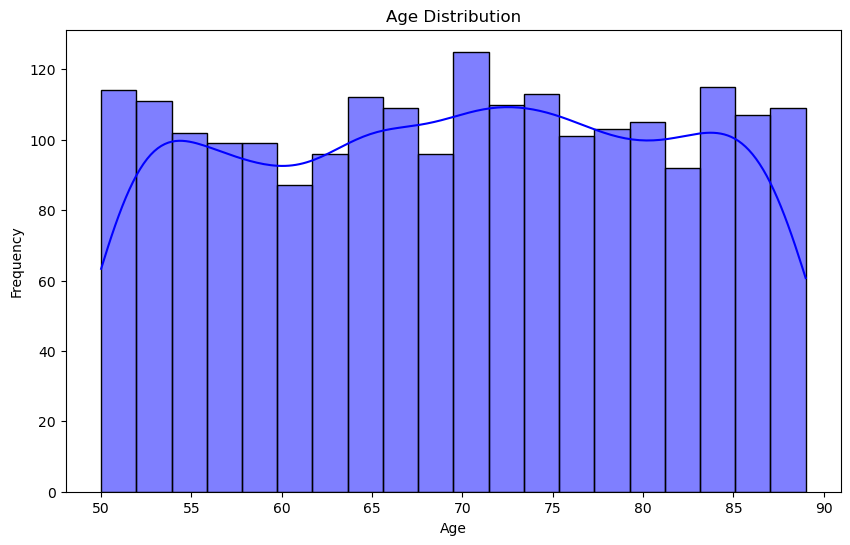

C:\Users\padnp\AppData\Local\Temp\ipykernel_5724\3251349705.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set2')


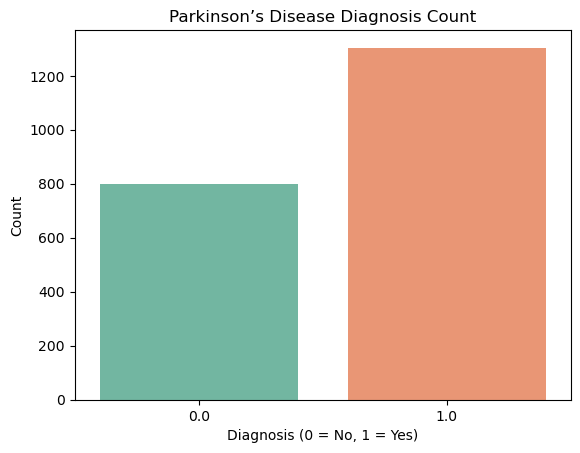

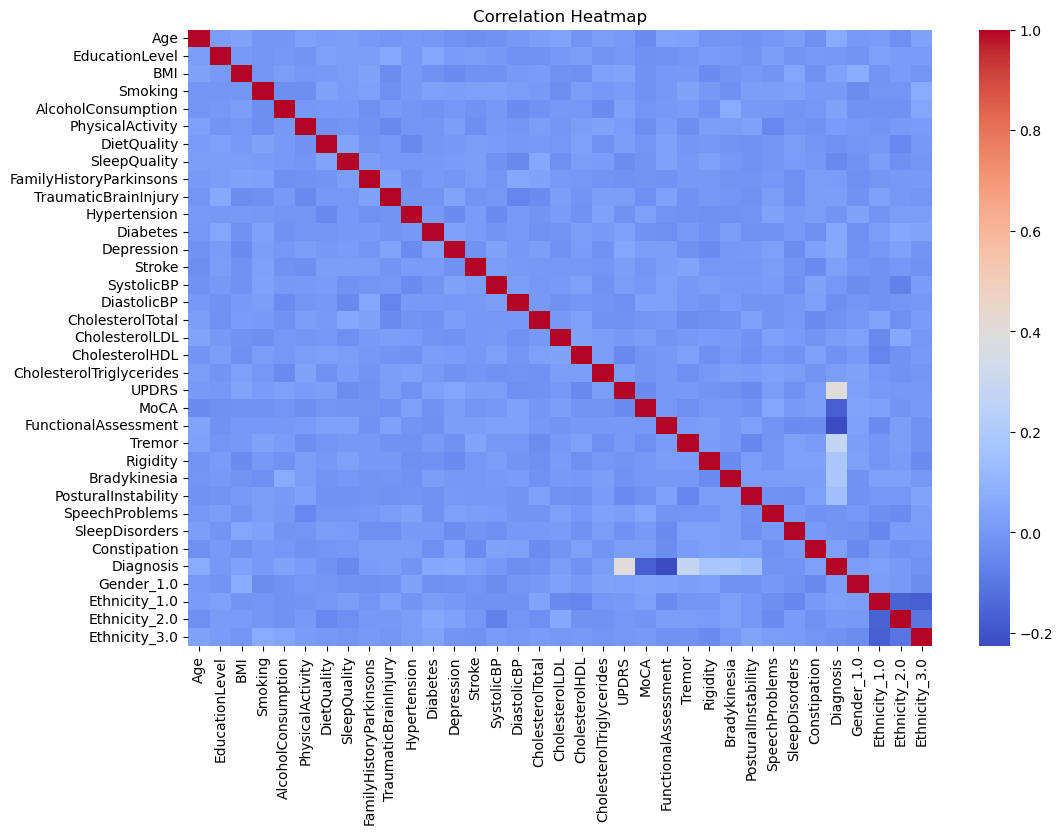

In [4]:
# Plot distributions of key demographic features
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot counts of diagnosis outcomes
sns.countplot(x='Diagnosis', data=df, palette='Set2')
plt.title('Parkinson’s Disease Diagnosis Count')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# 5. Feature Selection and Data Splitting

In [5]:
# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_res.value_counts())

Class distribution after SMOTE:
Diagnosis
0.0    1033
1.0    1033
Name: count, dtype: int64


# 6. Training and Evaluating Models


Training XGBoost model...
Accuracy for XGBoost: 0.9144893111638955
Confusion Matrix for XGBoost:
 [[140  10]
 [ 26 245]]
Classification Report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.84      0.93      0.89       150
         1.0       0.96      0.90      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.92      0.91      0.92       421



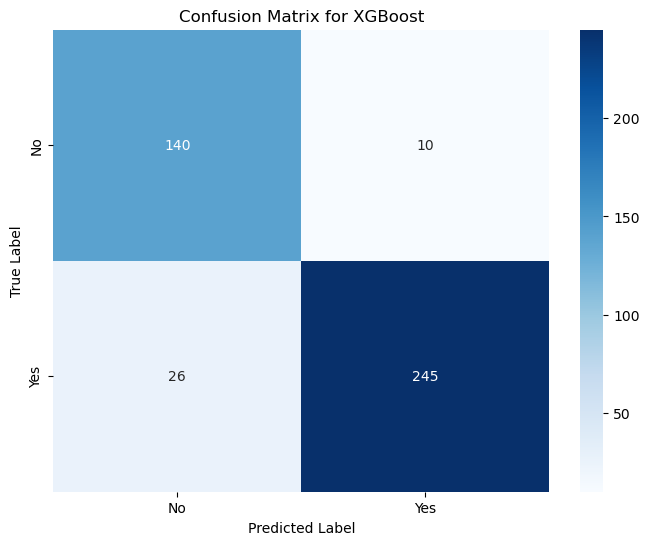

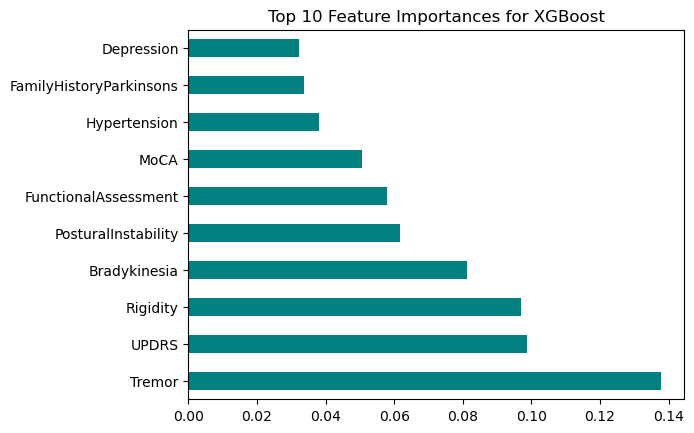


Training Logistic Regression model...
Accuracy for Logistic Regression: 0.8052256532066508
Confusion Matrix for Logistic Regression:
 [[115  35]
 [ 47 224]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       150
         1.0       0.86      0.83      0.85       271

    accuracy                           0.81       421
   macro avg       0.79      0.80      0.79       421
weighted avg       0.81      0.81      0.81       421



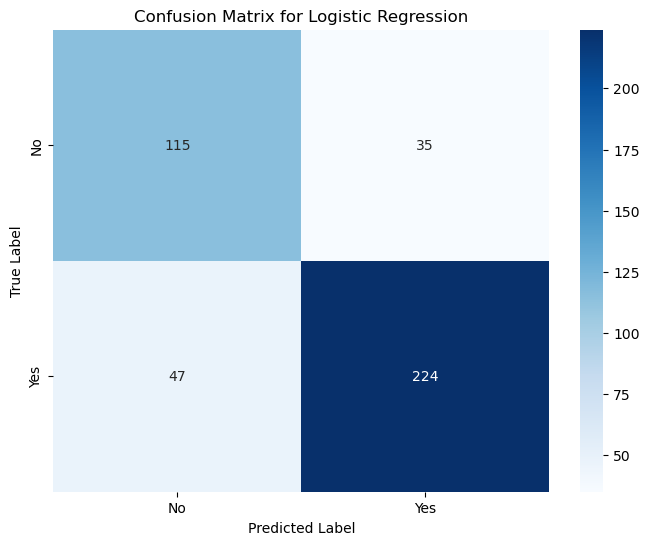


Training Random Forest model...
Accuracy for Random Forest: 0.8907363420427553
Confusion Matrix for Random Forest:
 [[135  15]
 [ 31 240]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85       150
         1.0       0.94      0.89      0.91       271

    accuracy                           0.89       421
   macro avg       0.88      0.89      0.88       421
weighted avg       0.90      0.89      0.89       421



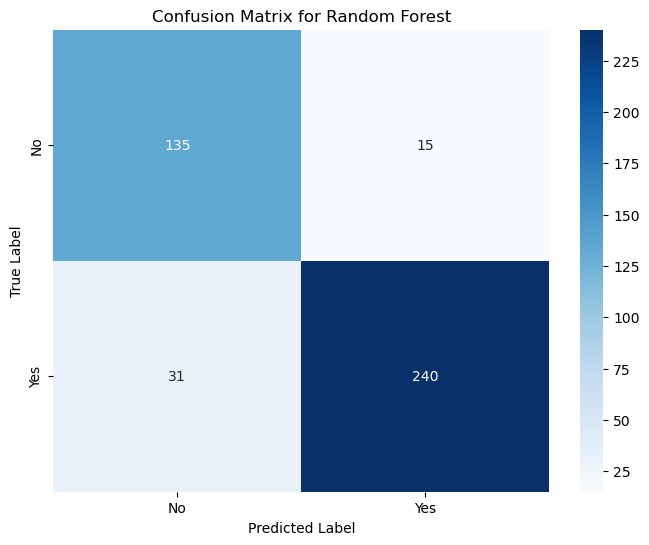

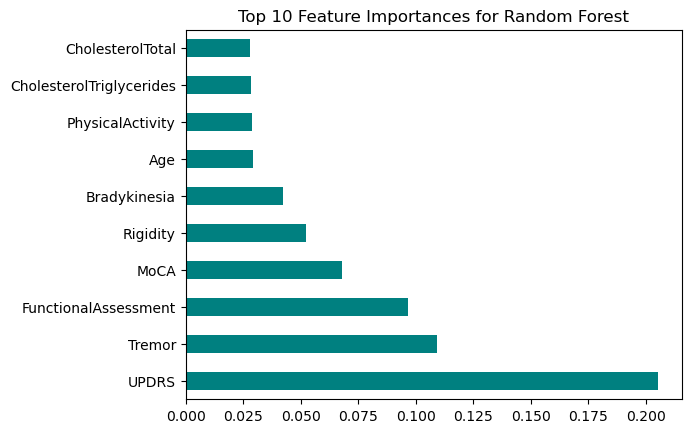


Training SVM model...
Accuracy for SVM: 0.7909738717339667
Confusion Matrix for SVM:
 [[114  36]
 [ 52 219]]
Classification Report for SVM:
               precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       150
         1.0       0.86      0.81      0.83       271

    accuracy                           0.79       421
   macro avg       0.77      0.78      0.78       421
weighted avg       0.80      0.79      0.79       421



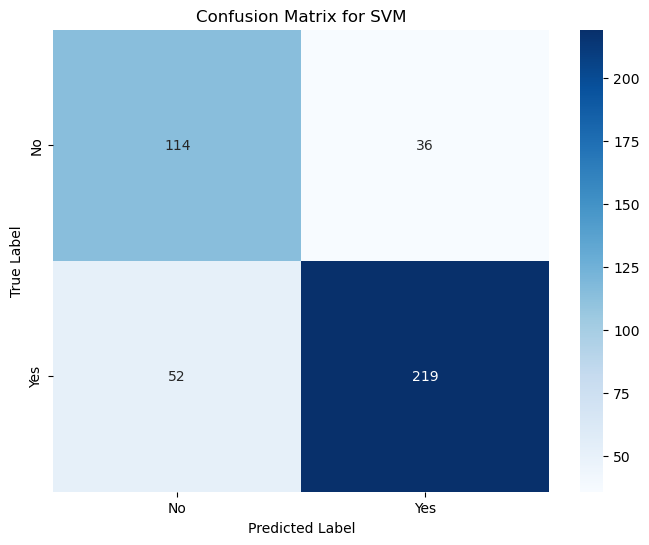

In [6]:
# Define models for classification
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")
    
    # Train model
    model.fit(X_train_res, y_train_res)
    
    # Model evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"Accuracy for {model_name}: {accuracy}")
    print(f"Confusion Matrix for {model_name}:\n", conf_matrix)
    print(f"Classification Report for {model_name}:\n", class_report)

    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Feature Importance (if available)
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.Series(model.feature_importances_, index=X.columns)
        feature_importances.nlargest(10).plot(kind='barh', color='teal')
        plt.title(f'Top 10 Feature Importances for {model_name}')
        plt.show()


# 7. Cross-Validation and Hyperparameter Tuning

# Cross-Validation

In [7]:
# Perform 5-fold Cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"\nCross-validated Accuracy for {model_name}: {np.mean(cv_scores)}")



Cross-validated Accuracy for XGBoost: 0.9239904988123515

Cross-validated Accuracy for Logistic Regression: 0.8095011876484561

Cross-validated Accuracy for Random Forest: 0.9206650831353919

Cross-validated Accuracy for SVM: 0.8166270783847981


# Hyperparameter Tuning


Tuning XGBoost hyperparameters...
Best parameters for XGBoost from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Model Accuracy for XGBoost: 0.9263657957244655


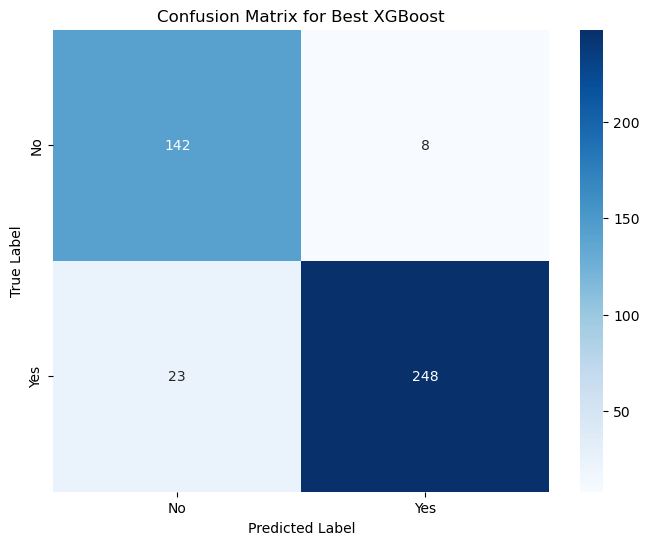


Tuning Logistic Regression hyperparameters...
Best parameters for Logistic Regression from GridSearchCV: {'C': 1.0, 'solver': 'liblinear'}
Best Model Accuracy for Logistic Regression: 0.8052256532066508


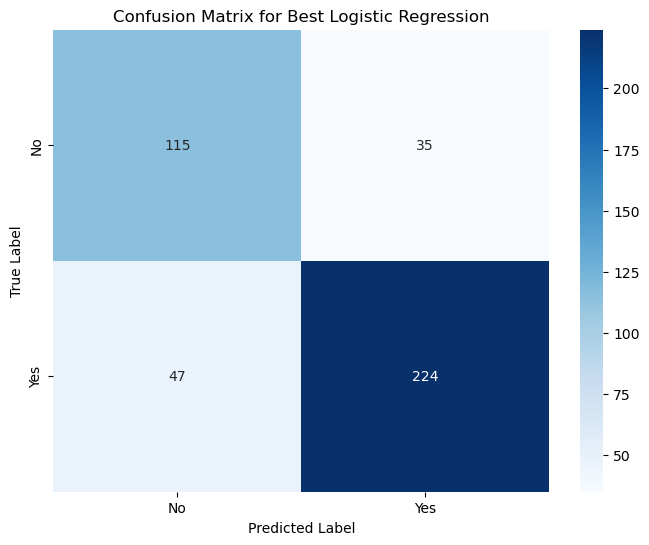


Tuning Random Forest hyperparameters...
Best parameters for Random Forest from GridSearchCV: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy for Random Forest: 0.9049881235154394


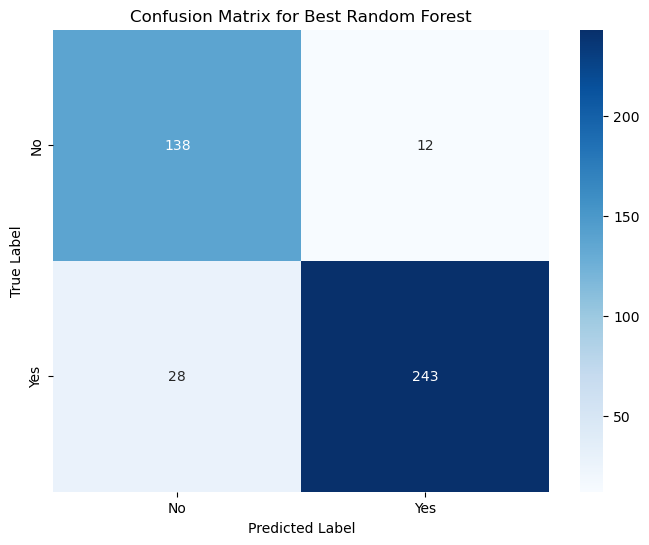


Tuning SVM hyperparameters...
Best parameters for SVM from GridSearchCV: {'C': 10.0, 'kernel': 'rbf'}
Best Model Accuracy for SVM: 0.7957244655581948


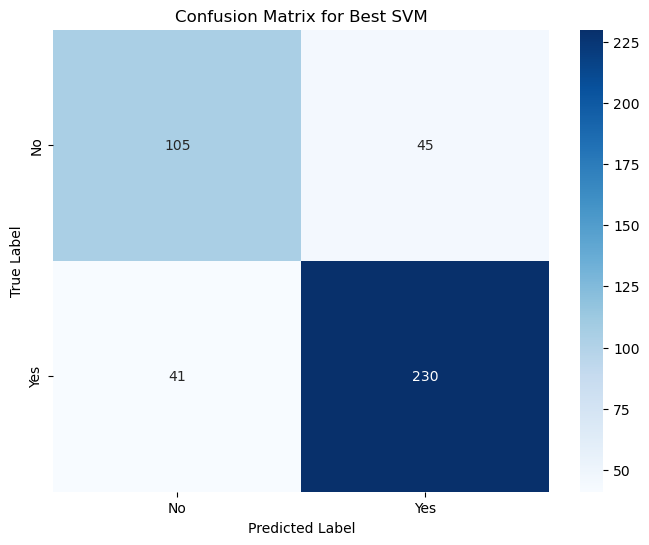

In [8]:
# Define hyperparameter grids for tuning
param_grid = {
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    },
    'Logistic Regression': {
        'C': [0.1, 1.0, 10.0],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf']
    }
}

# Perform GridSearchCV for each model
for model_name, grid in param_grid.items():
    print(f"\nTuning {model_name} hyperparameters...")
    model = models[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_res, y_train_res)
    
    print(f"Best parameters for {model_name} from GridSearchCV: {grid_search.best_params_}")
    
    # Evaluate tuned model
    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)
    accuracy_best = accuracy_score(y_test, y_pred_best)
    print(f"Best Model Accuracy for {model_name}: {accuracy_best}")
    
    conf_matrix_best = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for Best {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
